**선형 회귀를 훈련하는 크게 두가지 방법**

- 직접 계산하는 공식으로 최적의 모델 파라미터를 해석적으로 구한다

- 경사하강법을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 최소화 시킨다..
    - 배치, 미니배치, 확률적 경사하강법 등이 있다..

**다항 회귀**

- 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합 되기 쉽다..
- 학습곡선을 사용해서 과대적합 감지..

**분류**

- 로지스틱 회귀, 소프트맥스 회귀

#4.1 선형 회귀

- 입력 특성의 가중치 합과 편향이라는 상수를 더해서 예측을 만든다..
- 벡터 형태로 하면 더 간단히 쓸 수 있음..
    - 특성 벡터(**x**)와 모델파라미터(가중치) 벡터(**A** = (세타))를 만듦..
    - 편향에 곱해지는 x0는 항상 1로 만듦..
- $\hat{y} = XA$

**모델의 훈련**

- 오차(RMSE)를 최소화 시키는 **A**를 찾아야한다..
- 근데 MSE를 찾는거랑 똑같다..
- MSE = $((A^T)x - \hat{y})$ 의 제곱의 평균..
    - 즉, 모든 샘플에 대한 오차의 제곱을 평균한다는 말..

##4.1.1 정규방정식

- 비용 함수를 최소화 하는 A값을 찾기 위한 **해석적인 방법**

- MSE를 미분해서 0이 되는 A를 찾아라!
- $X^TXA = (X^T)(b)$를 푸는 것이다..
- (X_T)(X)가 역행렬이 있으면, 바로 A를 구할 수 있다!!
- $A = {{(X^TX)}^{-1}}(X^T)(b)$

In [1]:
#선형으로 보이는 데이터 생성
#randn : 정규분포 난수
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

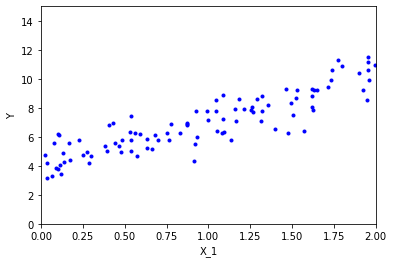

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0 , 2 , 0 , 15])
plt.xlabel("X_1")
plt.ylabel("Y")
plt.show()

**정규 방정식**

- $A = {{(X^TX)}^{-1}}(X^T)(b)$

In [3]:
# A = 세타 : 가중치들의 벡터..
# X : 입력특성 벡터..

#모든 샘플에 x0 = 1추가..
X_b = np.c_[np.ones((100,1)), X]
#정규방정식 적용
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.09099547],
       [3.01571555]])

**설명**

- 원래 4, 3을 주었는데
- 예측이 4.3, 2.8 이다..
- 꽤 정확..

**예측**

- $\hat{y} = XA$

In [5]:
#정규방정식으로 만든 세타로 만든 예측을 그래프로 그려보자..

#처음과 끝 값을 얻고 그래프 그리겟다..
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.09099547],
       [10.12242657]])

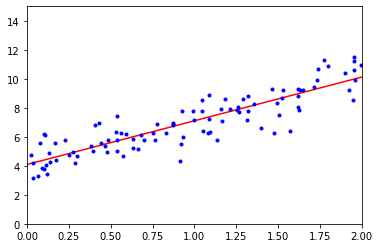

In [6]:
#모델의 예측을 그래프로..

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

**사이킷런에서 선형회귀**

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.09099547] [[3.01571555]]


In [8]:
print(lin_reg.predict(X_new))

[[ 4.09099547]
 [10.12242657]]


- scipy.linalg.lstsq()를 기반으로 하는데, 직접 호출도 가능
 - theta_best_svd : 최적의 세타 값을 저장..
 - residuals : theta_best_svd로 계산한 예측값과 실제 y값과의 제곱오차
 - rank : 무슨 행렬의 rank?
 - s : svd한 뒤의 singular value
 - rcond : s가 rcond값 보다 작으면 0으로 간주

**유사역행렬**

- 정규방정식에서 $(X^TX)^{-1}$가 존재하지 않는다면?
- 유사 역행렬 $X^{+}$를 구해서 
- 원래 예측식 $XA = \hat{y}$의 양변의 좌측에 곱해서
- $A = X^{+}\hat{y}$로 바로 구할 수도 있다..

In [9]:
theta_best_svd ,residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.09099547],
       [3.01571555]])

**정리**

- 보통은 정규 방정식으로 된다..
- 하지만 m < n(열이 더 많다)인 경우나 특이행렬이면 ($X^TX$)가 없으면 svd를 해서 유사 역행렬로 구해야 한다..
- 유사역행렬은 항상 구할 수 있다..

##4.1.2 계산 복잡도

**정규방정식**

- (n+1)(n+1)크기의 $X^TX$의 역행렬 계산해야함..
- O($n^2.4$) 에서 O($n^3$) 사이..

**사이킷런 LinearRegression(SVD)**

- O($n^2$)

-> 둘다 특성 수가 많아지면 매우 느려진다..

-> 샘플수에 대해서는 선형적으로 등가한다.. 

#4.2 경사 하강법

- 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 파라미터 값을 무작위로 시작해서 한 스텝마다 비용함수(MSE)가 감소되는 방향으로 진행..
- 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상..
- **학습률** 파라미터
    - 스텝의 크기를 지정해줘야함..
    - 너무 크면 골짜기를 건너뛰고
    - 너무 작으면 너무 더디게 내려감..

- 비용함수의 모양에 따라 **전역최솟값**보다 덜 좋은 **지역최솟값**에 수렴할 수도 있다..
    - 다행히 선형회귀의 비용함수는 2차식으로 **볼록함수**이다
    - 특성이 많을때는 지역최솟값도 괜찮다..

- 여러 특성의 스케일이 다르다면, 스케일링 하면 더 좋은 성능을 낸다..

##4.2.1 배치 경사 하강법

- 모든 샘플에 대해서 시행한다(배치)
- 전체 훈련세트를 사용하기 때문에 훈련세트가 커지면 매우 느리다
- 최소화하는 A(세타)를 랜덤초기화하고
- 각 특성의 방향으로 편미분해서 그레디언트를 구한다..
- $
\dfrac{\partial}{\partial \boldsymbol{A}} \text{MSE}(\boldsymbol{A})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{A} - \mathbf{y})
$
- 다음 스텝에서 세타를 그레디언트가 내려가는 방향으로 바꾼다..
- $
\boldsymbol{A}^{(\text{next step})} = \boldsymbol{A} - \eta \dfrac{\partial}{\partial \boldsymbol{A}} \text{MSE}(\boldsymbol{A})
$

In [10]:
eta = 0.1 #학습률
n_iterations = 100
m = 100

theta = np.random.randn(2,1) #랜덤 초기화

for iterations in range(n_iterations):
    #X_b는 x0=1을 추가한 입력 특성
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
#정규방정식으로 한것과 동일..
theta

array([[4.04064011],
       [3.05999778]])

In [12]:
#새로운 세타로 한 예측
X_new_b.dot(theta)

array([[ 4.04064011],
       [10.16063567]])

**학습률에 따라 10 스텝까지의 예측을 그리는 함수**

- 최적의 학습률은 그리드 탐색으로 찾음..
- 시간 단축을 위해서 반복횟수를 제한..
- 반복을 엄청 많이 해놓고 그레이디언트가 **허용오차**보다 작아지면 중지하는 방식..

In [47]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)    #100
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            if iteration > 0:
                style = "b-"
            else:   #처음 시작을 빨간줄..
                style = "r--"
            plt.plot(X_new, y_predict, style)
        
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        if theta_path is not None:
            #세타의 변화과정을 본다..
            theta_path.append(theta)
    plt.xlabel("X_1")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta$ ={}".format(eta))

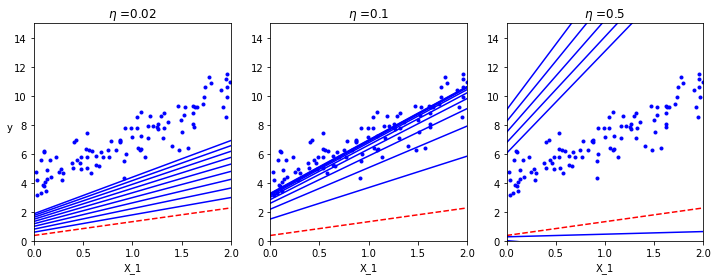

In [48]:
np.random.seed(42)
#랜덤초기화 세타 2개..
theta = np.random.rand(2,1)

plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

##4.2.2 확률적 경사 하강법

- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다..
    - 매 반복에서 다룰 데이터가 매우 적다.. -> 알고리즘이 훨씬 빠르고, 큰 훈련세트에도 적합..
- 확률적이기 때문에 훨씬 불안정하다..
    - 지역최솟값은 건너뛰게 해줄 수 있지만 전역 최솟값에 다다르지 못할 가능성이 높다..

-> 무작위성은 지역최솟값은 건너뛸 수 있지만 전역최솟값은 못간다.. -> 딜레마!!

**담금질 기법**

- **학습 스케쥴**
    - 매 반복에서 학습률을 결정하는 함수

- 위의 딜레마를 해결하는 방법
- 시작할 때는 학습률을 크게 하고, 점진적으로 학습률을 줄여가는 방법

**일반적으로 한 반복에서 m(샘플수)만큼 반복**

각 반복을 **에포크**라고 함


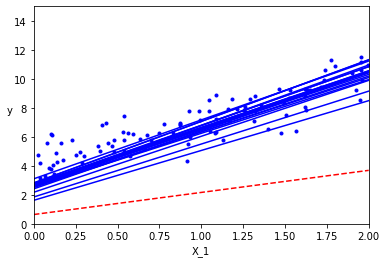

In [49]:
n_epochs = 50
t0, t1 = 5, 50  #학습 스케쥴 하이퍼파라미터
m = len(X_b)

def learning_schedule(t):
    #t가 커지면 점점 값은 줄어듦
    return t0 / (t + t1)

theta_path_sgd = []
theta = np.random.randn(2,1)        #랜덤초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            if i > 0:
                style = "b-"
            else:
                style = "r--"
            plt.plot(X_new, y_predict, style)
        
        random_index=np.random.randint(m)   #임의의 인덱스 잡기
        #인덱스에 맞는 원소 가져오기
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]

        #원소에 대한 그레이디언트 구하기
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        #epoch*m + i가 점점 커지므로 eta는 작아진다..
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")
plt.xlabel("X_1")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [50]:
#훨씬 좋은 세타값..
theta

array([[4.05137594],
       [3.0038097 ]])

**사이킷런의 SGDRegressor의 방식**

- 샘플이 무작위로 선택되기 때문에 한 에포크에서 같은 샘플이 여러번 선택될 수 있다
- 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞고 하나씩 사용하게 하고
- 다음 에포크에서 다시 섞는 식의 방법을 사용한다

**학습 스케쥴**

- invscaling(기본), constant, optimal, adaptive..
- t : 반복횟수
- eta0, power_t : 우리가 지정가능, 기본값 각각 0.01, 0.25
- 기본값일 때, $\eta^{t} = eta0 / t^{power_t}$

In [51]:
#학습 스케쥴은 기본값이 'invscaling'이다..

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

#ravel() : numpy 함수, 다차원 배열을 1차원 배열로 바꿔줌
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.09705019]), array([3.04737553]))

##4.2.3 미니배치 경사 하강법

**미니배치 경사하강법**

- 미니배치 : 임의의 작은 샘플 세트
- 미니배치에 대한 그레디언트를 계산함
- 장점 : GPU를 사용해서 얻는 성능 향상..
- 배치와 확률적 그 사이 중간단계..
    - 미니배치 크기를 크게하면 배치와 비슷해지고
    - 미니배치 크기를 작게하면 확률적과 비슷해진다..


**아래의 코드는 에포크마다 샘플을 섞는 과정이 포함되어 있다**

In [53]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):           #에포크 시작
    #permutation으로 인덱스 섞고
    shuffled_indices = np.random.permutation(m)
    #섞은 인덱스로 X_b와 y를 섞는다
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]     #미니배치 갯수만큼 사용한다
        yi = y_shuffled[i:i+minibatch_size]       #얘도 그렇다

        #그레이디언트 구하기
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(t)
        theta = theta - eta * gradients       #경사하강법 시행
        theta_path_mgd.append(theta)          #path 그릴려고 추가한다

      #중복을 허용하지 않는 샘플링을 사용한다

In [54]:
theta

array([[4.06831399],
       [2.97109819]])

**세가지 방법을 시행할 때 각각 theta의 변화를 보자**

In [55]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

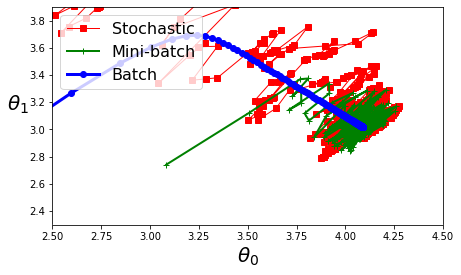

In [56]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
#각 방법들의 세타를 쭉 이어본다
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])   #x축 : 2.5~4.5   y축 : 2.3~3.9
plt.show()

**분석**

- 모두 최솟값 근처에 도달했다
- 배치 경사는 오랜시간이 걸리지만 실제로 최솟값에서 멈춘다
- 확률적과 미니배치는 근처에서 맴돈다.. 하지만 적절한 학습 스케쥴을 이용하면 최솟값에 도달한다!

#4.3 다항 회귀

- 특성이 여러개..
- **다항 회귀** : 비선형 데이터셋에 선형 모델을 훈련시키는 것

In [58]:
#2차방정식으로 비선형 데이터를 생성

m = 100
X = 6 * np.random.rand(m,1) -3        # -3 ~ 3의 난수
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

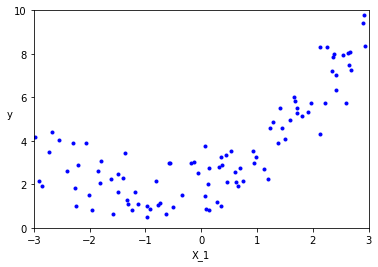

In [61]:
plt.plot(X, y, "b.")
plt.axis([-3,3,0,10])
plt.xlabel("X_1")
plt.ylabel("y",rotation=0)
plt.show()

**PolynomialFeatures**

- 각 특성을 서로 곱해서 새로운 특성으로 추가해줌..
- 서로 곱하기 때문에 시행하면 특성 수가 엄청나게 늘어날 수 있다!! (n 팩토리얼 개)

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [63]:
X[0], X_poly[0]

(array([2.38942838]), array([2.38942838, 5.709368  ]))

In [64]:
#이제 적용해보자..
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

#꽤 적확.. 원래 정답 : 2, 1, 0.5

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

**구한 값으로 그래프 그리기**

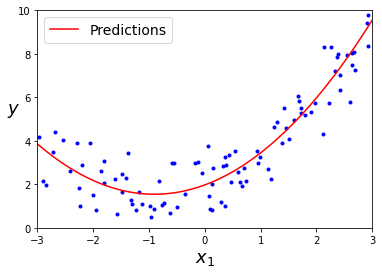

In [66]:
#범위 전체를 예측..
X_new=np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")

#예측의 그래프
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#4.4 학습 곡선

#4.5 규제가 있는 선형 모델

##4.5.1 릿지 회귀

##4.5.2 라쏘 회귀

##4.5.3 엘라스틱넷

##4.5.4 조기 종료

#4.6 로지스틱 회귀

##4.6.1 확률 추정

##4.6.2 훈련과 비용 함수

##4.6.3 결정 경계

##4.6.4 소프트맥스 회귀

#4.7 연습문제